Ingrese el nombre del equipo que desea analizar: River Plate
Ingrese la fecha de inicio del rango de años (ejemplo: 12/10/2013): 12/10/2013
Ingrese la fecha de fin del rango de años (ejemplo: 13/10/2014): 13/10/2014
Datos del equipo seleccionado con predicciones:
                    Home                Away  HG  AG Res  Prediccion
579          River Plate       Gimnasia L.P.   1   0   H    0.622124
597          River Plate          Godoy Cruz   1   2   A   -0.160295
619          River Plate         San Lorenzo   1   0   H    0.622124
637          River Plate     Arsenal Sarandi   1   0   H    0.622124
659          River Plate               Lanus   2   0   H    0.956484
678          River Plate    Newells Old Boys   1   0   H    0.622124
699          River Plate        Atl. Rafaela   2   0   H    0.956484
716          River Plate     Velez Sarsfield   1   0   H    0.622124
738          River Plate         Racing Club   3   2   H    0.508424
757          River Plate             Quilmes  

C:\Users\Gilberto\AppData\Local\Temp\ipykernel_17856\4287804911.py:62: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  equipo_df = equipo_df[(equipo_df['Date'] >= fecha_inicio) & (equipo_df['Date'] <= fecha_fin)]


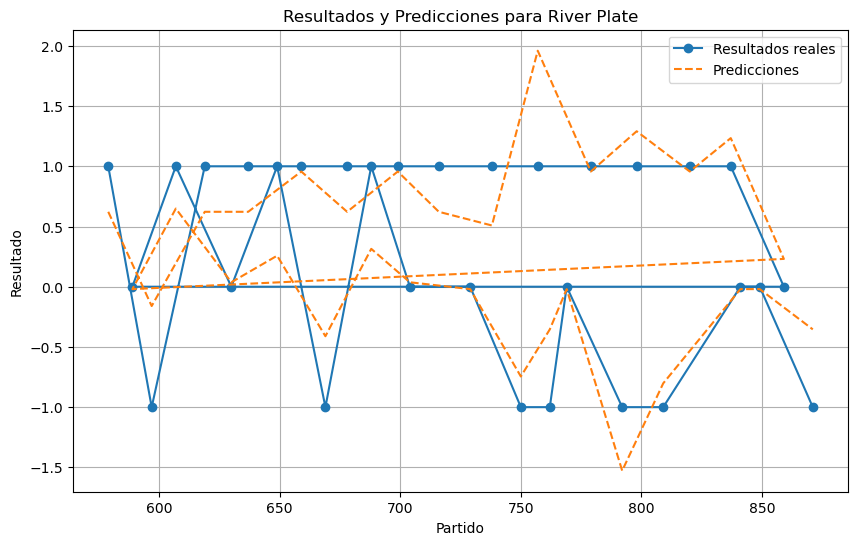

In [34]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Cargar el archivo CSV
def cargar_datos(url):
    return pd.read_csv(url)

# Filtrar el DataFrame para el equipo seleccionado
def filtrar_equipo(df, equipo):
    equipo_local = df[df['Home'] == equipo]
    equipo_visitante = df[df['Away'] == equipo]
    return pd.concat([equipo_local, equipo_visitante])

# Crear columnas "Local" y "Resultado" en el DataFrame
def crear_columnas_equipo(df, equipo):
    df['Local'] = df['Home'].apply(lambda x: 1 if x == equipo else 0)
    df['Resultado'] = df['Res'].apply(lambda x: 0 if x == 'D' else 1 if x == 'H' else -1)
    return df

# Entrenar un modelo de regresión lineal y realizar predicciones
def entrenar_y_predecir(df, features, target):
    X = df[features]
    y = df[target]
    modelo = LinearRegression()
    modelo.fit(X, y)
    df['Prediccion'] = modelo.predict(X)
    return modelo, df

# Graficar los resultados reales y las predicciones
def graficar_resultados(equipo_df):
    plt.figure(figsize=(10, 6))
    plt.plot(equipo_df.index, equipo_df['Resultado'], label='Resultados reales', marker='o')
    plt.plot(equipo_df.index, equipo_df['Prediccion'], label='Predicciones', linestyle='--')
    plt.title(f'Resultados y Predicciones para {equipo}')
    plt.xlabel('Partido')
    plt.ylabel('Resultado')
    plt.legend()
    plt.grid(True)
    plt.show()

# Solicitar al usuario el nombre del equipo que desea analizar
equipo = input("Ingrese el nombre del equipo que desea analizar: ")

# Solicitar al usuario la fecha de inicio del rango de años en formato "dd/mm/yyyy"
fecha_inicio = input("Ingrese la fecha de inicio del rango de años (ejemplo: 12/10/2013): ")

# Solicitar al usuario la fecha de fin del rango de años en formato "dd/mm/yyyy"
fecha_fin = input("Ingrese la fecha de fin del rango de años (ejemplo: 13/10/2014): ")

# Cargar los datos y filtrar para el equipo seleccionado
df = cargar_datos('https://www.football-data.co.uk/new/ARG.csv')
equipo_df = filtrar_equipo(df, equipo)

# Crear columnas "Local" y "Resultado"
equipo_df = crear_columnas_equipo(equipo_df, equipo)

# Convertir el formato "dd/mm/yyyy" a un formato de fecha de Pandas
equipo_df['Date'] = pd.to_datetime(equipo_df['Date'], format='%d/%m/%Y')

# Filtrar el DataFrame por el rango de fechas
equipo_df = equipo_df[(equipo_df['Date'] >= fecha_inicio) & (equipo_df['Date'] <= fecha_fin)]

# Entrenar el modelo y realizar predicciones
features = ['HG', 'AG', 'Local']
target = 'Resultado'
modelo, equipo_df = entrenar_y_predecir(equipo_df, features, target)

# Mostrar los datos del equipo seleccionado con predicciones
print("Datos del equipo seleccionado con predicciones:")
print(equipo_df[['Home', 'Away', 'HG', 'AG', 'Res', 'Prediccion']])

# Graficar los resultados reales y las predicciones
graficar_resultados(equipo_df)